# Case Study

## Task1 Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Get raw Data
df = pd.read_csv("data/house_data_training.csv", sep=';') 
#Deleting row index
df = df.iloc[:, 1:]

### Visualisation 

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
count,1.500000e+04,1.500000e+04,15000.000000,15000.00000,15000.000000,1.500000e+04,15000.000000,14997.000000,14997.000000,14997.000000,...,14997.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,4.562654e+09,3.328097e+06,3.372400,2.12635,2096.708267,1.469860e+04,1.509533,0.006801,937.559056,0.227646,...,1972.397546,77.436533,98076.245733,47.554242,-122.213894,1991.374400,12566.263467,48.617462,104.143663,152.761125
std,2.867844e+09,1.643430e+07,0.902832,0.76925,984.417205,3.842964e+04,0.545462,0.082192,268.828882,0.755120,...,29.545072,385.447294,53.580436,0.140877,0.139778,692.536001,26827.490013,22.174254,13.005133,25.724786
min,1.000102e+06,1.000000e+04,0.000000,0.00000,370.000000,5.200000e+02,1.000000,0.000000,93.000000,0.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000,10.010585,55.397985,75.072384
25%,2.124064e+09,3.180000e+05,3.000000,1.75000,1430.000000,5.000000e+03,1.000000,0.000000,757.720000,0.000000,...,1953.000000,0.000000,98031.000000,47.458500,-122.326000,1480.000000,5040.000000,29.262797,95.316786,132.916027
50%,3.888100e+09,4.517775e+05,3.000000,2.25000,1920.000000,7.566000e+03,1.500000,0.000000,936.580000,0.000000,...,1977.000000,0.000000,98065.000000,47.566950,-122.234000,1840.000000,7601.000000,48.557508,104.253927,152.870930
75%,7.300410e+09,6.600000e+05,4.000000,2.50000,2570.000000,1.068575e+04,2.000000,0.000000,1116.120000,0.000000,...,1999.000000,0.000000,98117.000000,47.675325,-122.126000,2380.000000,10050.000000,67.847538,112.975883,172.439485
max,9.895000e+09,1.000000e+08,11.000000,8.00000,17180.000000,1.164794e+06,3.500000,1.000000,1919.340000,4.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,6210.000000,871200.000000,86.999842,157.639420,229.276426


In [ ]:
#JOKE: Aber vllt. was ähnliches zur ersten visualisierung
sns.pairplot(df, 
    x_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    y_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    corner=True)

### Korrelation
#### Visualisierung
Spearman Korrelation aufgrund der fehlenden normalverteilung. Wert um 0 bedeuten eine geringe Kerrelation. Werte richtung 1 oder -1 zeigen eine starke Korrelation (positiv & negativ)

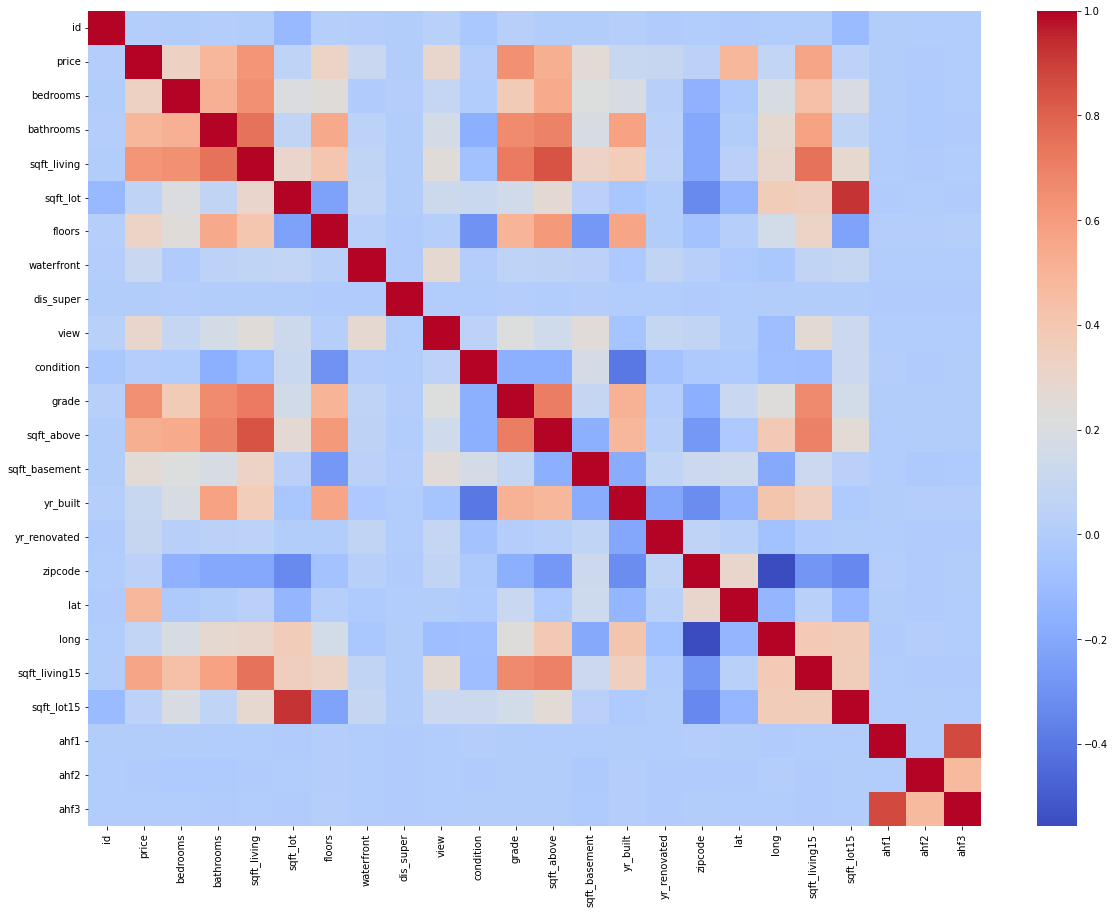

In [13]:
#data 
corr =df.corr(method="spearman")
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr,cmap=cmap)
plt.show()

#### In Zahlen

In [7]:
corr_fig = corr["price"]
ix = corr.sort_values('price', ascending=False).index
for i in ix:
    print("Die Korrelation von", i,"zum Preis:", corr_fig[i])

Die Korrelation von price zum Preis: 1.0
Die Korrelation von grade zum Preis: 0.6401067473706725
Die Korrelation von sqft_living zum Preis: 0.6062749275007229
Die Korrelation von sqft_living15 zum Preis: 0.5421231339869004
Die Korrelation von sqft_above zum Preis: 0.5159252796909916
Die Korrelation von bathrooms zum Preis: 0.4929443152367283
Die Korrelation von lat zum Preis: 0.4585259627037452
Die Korrelation von floors zum Preis: 0.3462941803523132
Die Korrelation von bedrooms zum Preis: 0.3176570486167373
Die Korrelation von view zum Preis: 0.2683337124341474
Die Korrelation von sqft_basement zum Preis: 0.22884018395222322
Die Korrelation von yr_built zum Preis: 0.16733427424846842
Die Korrelation von waterfront zum Preis: 0.09890211702041925
Die Korrelation von yr_renovated zum Preis: 0.08277683118942765
Die Korrelation von long zum Preis: 0.07914908402820331
Die Korrelation von zipcode zum Preis: 0.03421738873320275
Die Korrelation von sqft_lot zum Preis: 0.015221518831488031
Die 

#### Schlussfolgerungen
Mit dem Preis korrelieren insbesondere die Features 'grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'floors' und 'bedrooms' Diese sollten bei der Feature Selection aufjedenfall berücksichtigt werden.

### Missing Values
##### NaN 

In [ ]:
df.info()

In [9]:
print("Die Anzahl der Zeilen, in denen MV vorhanden und gekennzeichnet sind beträgt",len(df[df.isnull().any(axis=1)]),":")
df[df.isnull().any(axis=1)]

Die Anzahl der Zeilen, in denen MV vorhanden und gekennzeichnet sind beträgt 3 :


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
7163,2624049185,20140909T000000,405000.0,3,1.75,1760,5355,1.0,NaN,NaN,...,NaN,0,98118,47.5368,-122.267,1790,6225,13.843391,109.343999,123.187390
10957,9222400510,20150107T000000,406000.0,2,1.00,880,3000,1.0,NaN,NaN,...,NaN,0,98115,47.6749,-122.323,890,3000,50.170114,102.588214,152.758329
14780,7011201245,20141107T000000,655000.0,3,1.00,1270,3600,1.5,NaN,NaN,...,NaN,0,98119,47.6368,-122.370,1710,3600,56.035650,121.245433,177.281083


Es fehlen drei Werte in den Features "Waterfront", "dis_super", "view", "condition", "grade", "sqft_above", "sqft_basement" und "yr_build". Da diese aber alle in den selben drei Zeilen Fehlen kann man auch aufgrund der Größe des Datensatzes diese drei Zeilen löschen.

In [4]:
#Löschen aller Zeilen mit MV
df=df.dropna()

### Weitere fehlende Werte

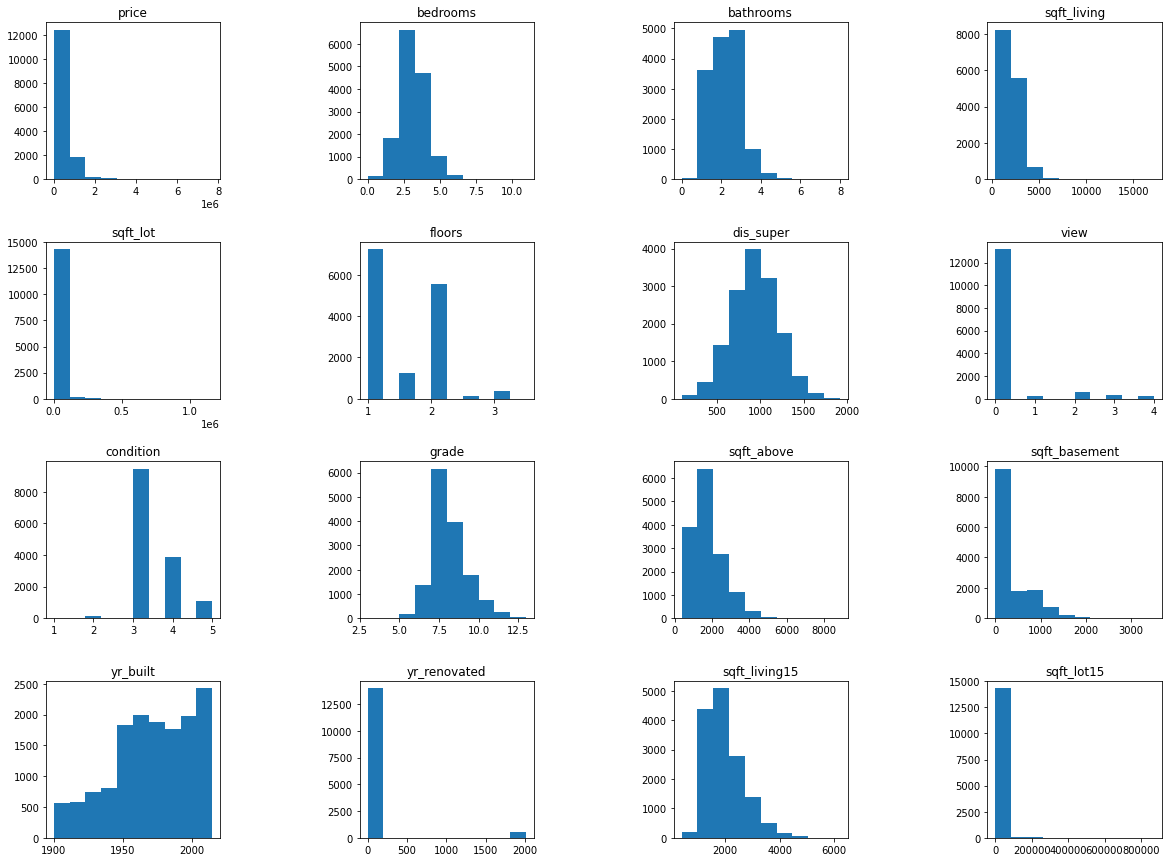

In [70]:
#Hab mir mal deinen Code geklaut -Tim
re_col=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

x=0
for i in re_col:
    ax[x].hist(df[i])
    ax[x].set_title(i)
    x+=1

In [13]:
df.condition.describe()

count    14997.000000
mean         3.395279
std          0.642622
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

Bei den Features **view** und **yr_renovated** enthält ein großteil der Zeilen den Wert 0.  
Im Fall von **view** könnte die 0 ein Teil der Skala sein, allerdings ist auffällig, wie oft der Wert auftaucht.  
Bei **yr_renovated** ist der Wert keine Jahresangabe. Er könnte aber trotzdem eine Information enthalten.

Auch bei **price**, **sqft_lot** und **sqft_lot 15** gibt es unnatürlich viele Werte bei 0. Das scheint aber an Ausreißern (siehe weiter unter) und der kleinen Darstellung zu liegen.


In [71]:
len_original = len(df)
len_view_values = len(df.loc[df.view != 0])
len_renovated_values = len(df.loc[df.yr_renovated != 0])

print(f"view:\nVon {len_original} Zeilen enthalten {len_view_values} einen Wert\nDas sind {round(len_view_values/len_original*100, 2)}%\n")
print(f"yr_renovated:\nVon {len_original} Zeilen enthalten {len_renovated_values} einen Wert\nDas sind {round(len_renovated_values/len_original*100, 2)}%\n")

view:
Von 14565 Zeilen enthalten 1407 einen Wert
Das sind 9.66%

yr_renovated:
Von 14565 Zeilen enthalten 582 einen Wert
Das sind 4.0%



Die Features **view** und **yr_renovated** enthalten größtenteils fehlende Werte. Die Zeilen zu entfernen ist daher keine Option.  
Außerdem liefern uns diese fehlenden Werte womöglich Informationen:  

*Anmerkung: der folgende Teil wurde erst nach der Ausreißer behandlung ausgeführt*

In [79]:
no_renovated_mean = round(df.loc[df.yr_renovated == 0].price.mean(), 2)
renovated_mean = round(df.loc[df.yr_renovated != 0].price.mean(), 2)

print(f"The median price for buildings without a renovation date is : {no_renovated_mean}\nThe median price for buildings with a renovation date is : {renovated_mean}")

The median price for buildings without a renovation date is : 520105.54
The median price for buildings with a renovation date is : 751459.07


<BarContainer object of 5 artists>

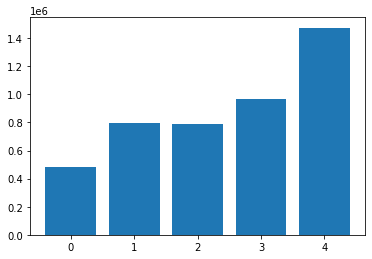

In [17]:
view_df = df.loc[:, ["view", "price"]].groupby("view").mean()

plt.bar(view_df.index, view_df.price)

Obwohl die Wertung 0 im Feature **view** unüblich oft auftaucht, scheint sie nicht weiter ungewöhnlich zu sein. Der durchschnittliche Preis steigt einigermaßen gleichmäßig von 0 bis 5 an.

### Outliers

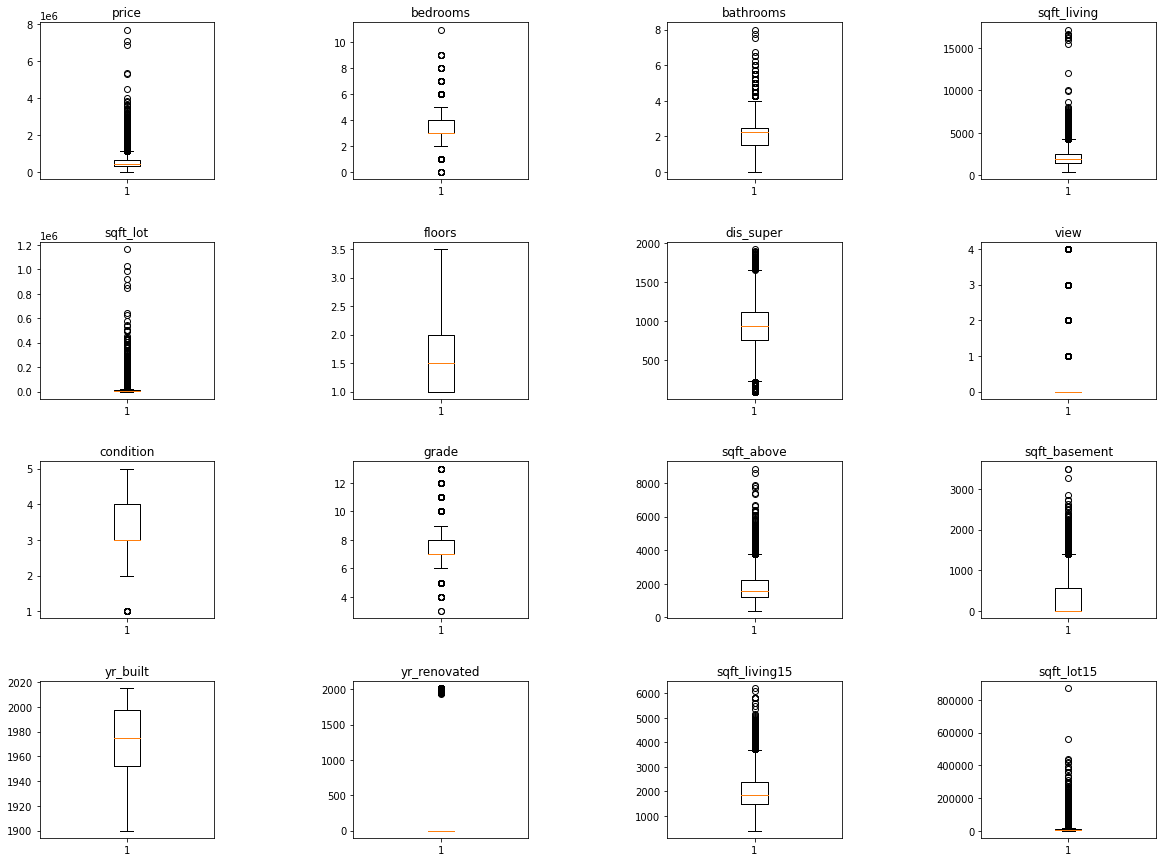

In [69]:
#Visuallisierung von Ausreißern
re_col=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

x=0
for i in re_col:
    ax[x].boxplot(df[i])
    ax[x].set_title(i)
    x+=1

#Ausreißer behandlung natürlich erst nach der Normalisierung aber für den ersten überblick. 
#Anmerkung von Tim: Warum erst nach der Normalisierung? Normalisierung kann nicht mit Ausreßern umgehen. 

In [20]:
df.loc[df.view != 0].view

1        4.0
6        2.0
19       4.0
20       3.0
32       1.0
        ... 
14918    4.0
14928    2.0
14940    1.0
14946    2.0
14958    2.0
Name: view, Length: 1436, dtype: float64

Ganz klare Ausreißer beim Preis und bei den verschiedenen Flächen (sqft_...)  
  
Außerdem auffällig:  
**yr_renovated** und **view** enthalten sehr oft den Wert 0



In [12]:
print("Die Größten zehn Werte des Features price:")
print(np.sort(df.price.unique())[-10:])
print("\nDie höchsten beiden Werte im Feature price scheinen keine Validen Preise für Gebäude zu sein. "\
    "\n9,99 Millionen wären zwar ein denkbares Preis für ein Luxuriöses Gebäude, da der Preis jedoch nur aus Neunen besteht scheint das eher unrealistisch."\
    "\nAußerdem fällt auf, dass die beiden höchsten Werte die selben sind, bis auf das Komma, das um eine Stelle verschoben ist. "
    "\nEs scheint sich um einen falschen Wert, oder einen falsch gekennzeichneten fehlenden Wert zu handeln.\n")

print("Anzahl Ausreißer mit 99 Millionen: " + str(len(df.loc[df.price == 99999999.0])))
print("Anzahl Ausreißer mit 9 Millionen: " + str(len(df.loc[df.price == 9999999.9])))

df = df.loc[df.price != 99999999.0].loc[df.price != 9999999.9]

Die Größten zehn Werte des Features price:
[ 3850000.   4000000.   4500000.   5300000.   5350000.   6885000.
  7062500.   7700000.   9999999.9 99999999. ]

Die höchsten beiden Werte im Feature price scheinen keine Validen Preise für Gebäude zu sein. 
9,99 Millionen wären zwar ein denkbares Preis für ein Luxuriöses Gebäude, da der Preis jedoch nur aus Neunen besteht scheint das eher unrealistisch.
Außerdem fällt auf, dass die beiden höchsten Werte die selben sind, bis auf das Komma, das um eine Stelle verschoben ist. 
Es scheint sich um einen falschen Wert, oder einen falsch gekennzeichneten fehlenden Wert zu handeln.

Anzahl Ausreißer mit 99 Millionen: 421
Anzahl Ausreißer mit 9 Millionen: 11


### Noise

### Transformed, standardized or normalized

In [ ]:
#Transform Data 

#Example --> string to datetime
df["date"] = pd.to_datetime(df["date"])
print(df["grade"])
df.tail()

### Featurewise

In [ ]:
print(df.columns)

**ID**  
Identifier. Kein Mehrwert für ML.  
--> Entfernen

**Date**  
Anscheinend keine Ausreißer  
Das Datum sollte man vermutlich einfach so lassen.  
--> ?

In [ ]:
plt.hist(df.price)